In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Loading

In [ ]:
_data = load_diabetes()
data = _data['data']
feature_names = _data['feature_names']

df = pd.DataFrame(data, columns=feature_names)
df['target'] = _data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


<Axes: >

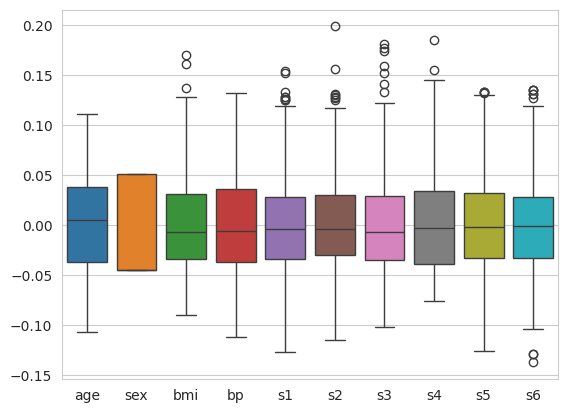

In [4]:
sns.boxplot(data=df.drop("target", axis=1))

# EDA
## Correlation

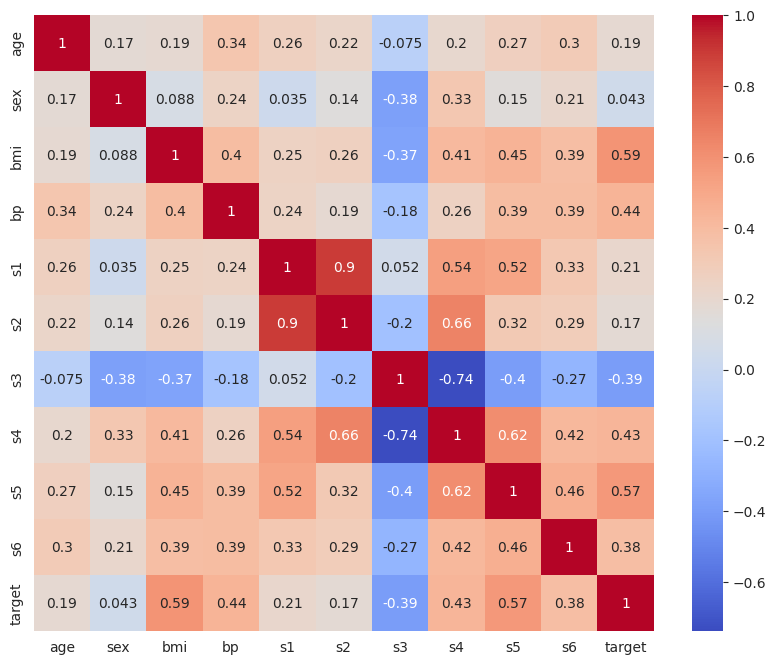

In [5]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data=df.corr(),
    annot=True,
    cmap="coolwarm",
)

plt.show()

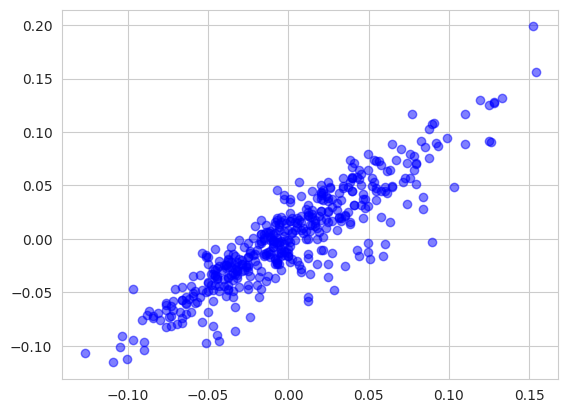

In [ ]:
# s1 - s2 : 다중공선성 확인 (corr : 0.9)
# 독립변수가 서로 영향을 미치는 다중공선성을 가지면 안좋음
plt.scatter(df["s1"], df["s2"], alpha=0.5, color="blue")

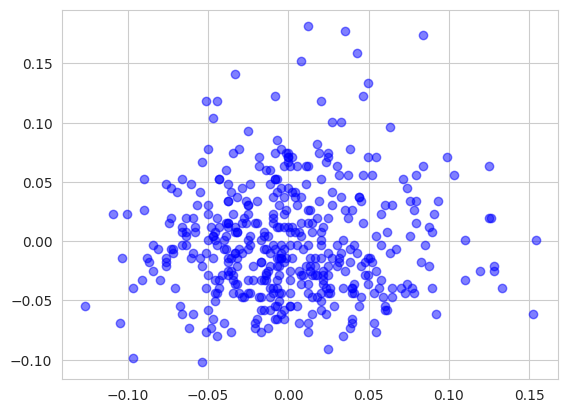

In [7]:
# s1 - s3 : 다중공선성 확인 (corr : 0.052)
plt.scatter(df["s1"], df["s3"], alpha=0.5, color="blue")

In [8]:
# s1 - s2 : 다중공선성 제거 
df_ = df.drop(["s2"], axis=1) 
df_.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0081,-0.0026,-0.0320,-0.0466,135.0000


# Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

## Dataset Definition

In [10]:
X = df_.drop("target", axis=1)
y = df_["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
)

In [11]:
print(
    len(df_), 
    len(X_train), 
    len(X_test)
)

442 353 89


In [12]:
print(353 + 89, 353 / 442)

442 0.7986425339366516


In [13]:
X_train.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6
17,0.0708,0.0507,0.0121,0.0563,0.0342,-0.0397,0.0343,0.0274,-0.0011
66,-0.0091,0.0507,-0.0181,-0.0332,-0.0208,-0.0729,0.0712,0.0003,0.0196
137,0.0054,-0.0446,0.0498,0.0976,-0.0153,-0.0066,-0.0026,0.0170,-0.0135
245,-0.0273,-0.0446,-0.0353,-0.0298,-0.0566,0.0302,-0.0395,-0.0499,-0.1295
31,-0.0237,-0.0446,-0.0655,-0.0814,-0.0387,0.0597,-0.0764,-0.0371,-0.0425


In [14]:
y_train.head()

17    144.0000
66    150.0000
137   280.0000
245   125.0000
31     59.0000
Name: target, dtype: float64

## Model 

[Reference] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_train, y_train)

0.5251250434558368

In [17]:
print(
    model.intercept_,
    model.coef_,
)

151.3010031750481 [  43.18112296 -241.37620081  555.70975248  344.64739047 -316.74521664
  -81.32562922  241.18350712  492.77226453   53.00257379]


In [18]:
X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

## Data Processing

- age, s3, s6 : 낮은 회귀계수

In [19]:
df_fs = df_.drop(["age", "s3", "s6"], axis=1)
df_fs.head()

,sex,bmi,bp,s1,s4,s5,target
0,0.0507,0.0617,0.0219,-0.0442,-0.0026,0.0199,151.0000
1,-0.0446,-0.0515,-0.0263,-0.0084,-0.0395,-0.0683,75.0000
2,0.0507,0.0445,-0.0057,-0.0456,-0.0026,0.0029,141.0000
3,-0.0446,-0.0116,-0.0367,0.0122,0.0343,0.0227,206.0000
4,-0.0446,-0.0364,0.0219,0.0039,-0.0026,-0.0320,135.0000


<Axes: >

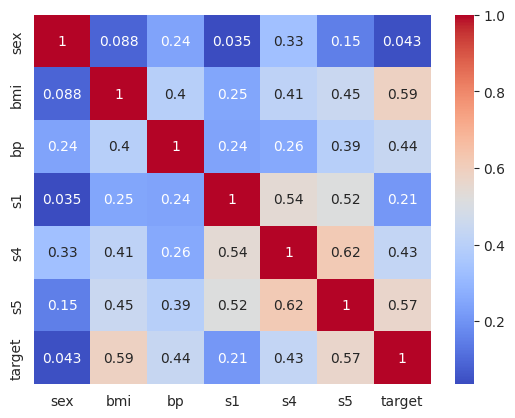

In [20]:
sns.heatmap(
    df_fs.corr(),
    annot=True,
    cmap="coolwarm",
)

In [21]:
# 낮은 상관관계 삭제 : sex
df_fs_ = df_fs.drop(["sex"], axis=1)
df_fs_.head()

,bmi,bp,s1,s4,s5,target
0,0.0617,0.0219,-0.0442,-0.0026,0.0199,151.0000
1,-0.0515,-0.0263,-0.0084,-0.0395,-0.0683,75.0000
2,0.0445,-0.0057,-0.0456,-0.0026,0.0029,141.0000
3,-0.0116,-0.0367,0.0122,0.0343,0.0227,206.0000
4,-0.0364,0.0219,0.0039,-0.0026,-0.0320,135.0000


<Axes: >

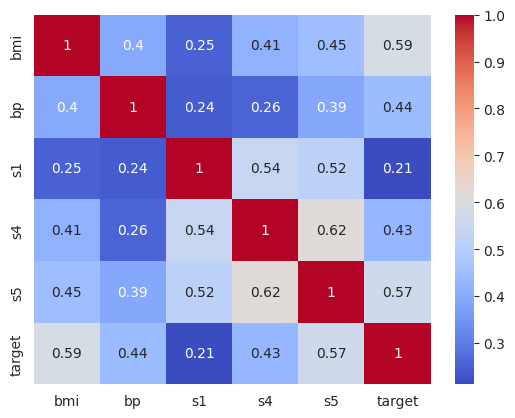

In [22]:
sns.heatmap(
    df_fs_.corr(),
    annot=True,
    cmap="coolwarm",
)

## Retraining

In [23]:
X = df_fs_.drop("target", axis=1)
y = df_fs_["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print(
    model.score(X_train, y_train),
    model.intercept_,
    model.coef_,
)

0.5073701775333852 151.40760187741347 [ 611.82992106  312.28112428 -306.74501345  205.14484468  535.38980618]


In [26]:
X_train.columns

Index(['bmi', 'bp', 's1', 's4', 's5'], dtype='object')

## Prediction

In [27]:
pred = model.predict(X_test)

In [28]:
print(
    r2_score(y_test, pred),
    mean_squared_error(y_test, pred),
    mean_absolute_percentage_error(y_test, pred),
)

0.4389755013359684 2972.3929285574886 0.38524538187524665


In [29]:
df_pred = pd.DataFrame(
    {
        "y_test": y_test,
        "pred": pred,
    }
)

df_pred["gap"] = abs(df_pred["y_test"] - df_pred["pred"])

df_pred.head()

,y_test,pred,gap
287,219.0000,128.6678,90.3322
211,70.0000,168.3179,98.3179
72,202.0000,158.1168,43.8832
321,230.0000,272.9563,42.9563
73,111.0000,130.8688,19.8688


In [30]:
df_pred.sort_values("gap", ascending=False).head()

,y_test,pred,gap
56,52.0000,196.7927,144.7927
77,200.0000,69.9796,130.0204
9,310.0000,204.5269,105.4731
218,214.0000,111.3674,102.6326
209,77.0000,177.5084,100.5084


In [31]:
df_pred.sort_values("gap", ascending=True).head()

,y_test,pred,gap
436,48.0000,49.5501,1.5501
418,84.0000,85.8624,1.8624
429,94.0000,90.7183,3.2817
281,94.0000,98.2801,4.2801
370,63.0000,57.6863,5.3137


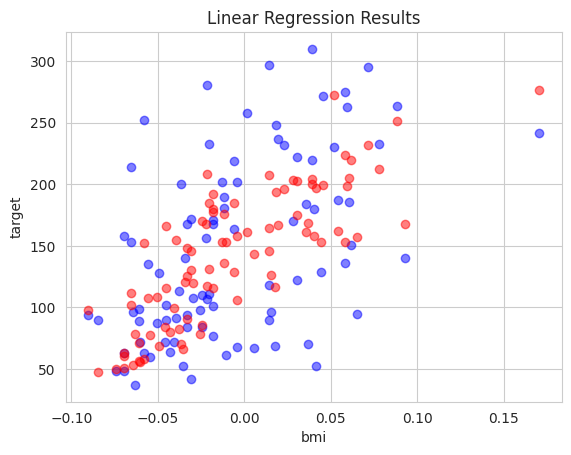

In [32]:
plt.scatter(X_test["bmi"], y_test, alpha=0.5, color="blue")
plt.scatter(X_test["bmi"], pred, alpha=0.5, color="red")

plt.title("Linear Regression Results")
plt.xlabel("bmi")
plt.ylabel("target")
plt.show()

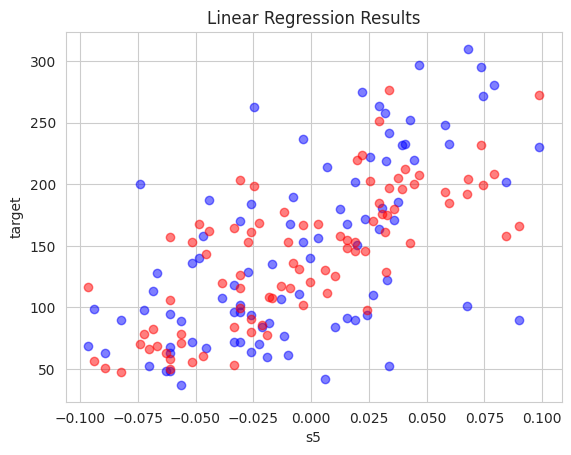

In [33]:
plt.scatter(X_test["s5"], y_test, alpha=0.5, color="blue")
plt.scatter(X_test["s5"], pred, alpha=0.5, color="red")

plt.title("Linear Regression Results")
plt.xlabel("s5")
plt.ylabel("target")
plt.show()

----
** End of Documents ** 